#カーネル密度推定：滑らかなヒストグラムを作成する. seabornの使い方
#bandwidth バンド幅をいじる 
$$h=(\frac{4σ^5}{3n})^{\frac{1}{5}}$$

In [2]:
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib as mpl

from scipy import stats

%matplotlib inline

In [3]:
dataset = randn(25)

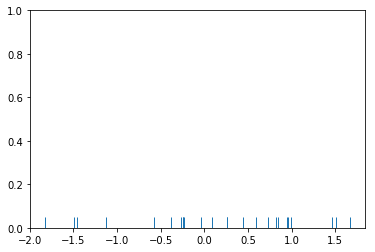

In [4]:
sns.rugplot(dataset)
#データがあるところに線が引かれる

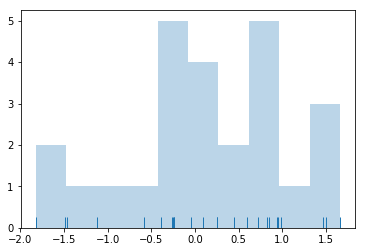

In [5]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

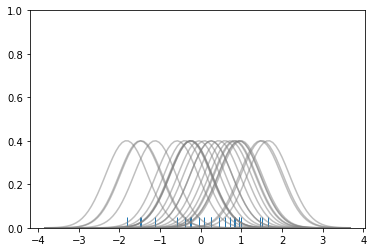

In [6]:
sns.rugplot(dataset)

x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)

bandwidth=((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*0.4
    plt.plot(x_axis, kernel, color = "gray", alpha = 0.5)
    plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

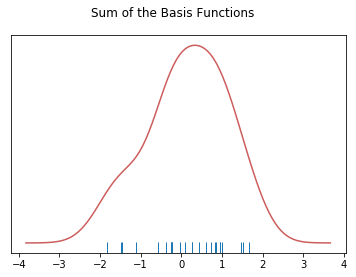

In [8]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis, sum_of_kde, color = "indianred")
sns.rugplot(dataset)
plt.yticks([])
#y軸を消している
plt.suptitle("Sum of the Basis Functions")


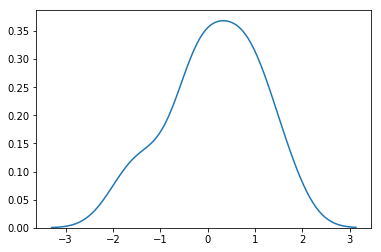

In [9]:
#seabornでは一行でカーネル密度推定ができる
sns.kdeplot(dataset)

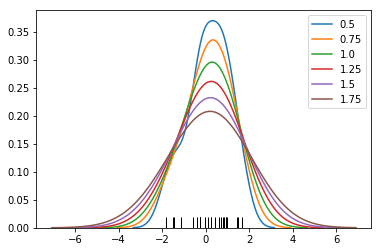

In [10]:
#バンド幅を変える。そのデータポイントの影響の広がり。大きければすそのが広がる
sns.rugplot(dataset, color = "black")
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, label =bw)

C:\Users\tetsu\Anaconda3\envs\tf111gpu\lib\site-packages\seaborn\distributions.py:289: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)


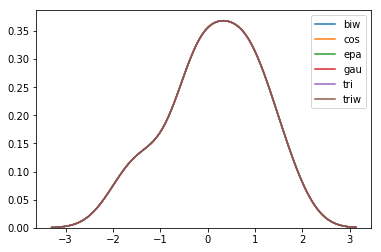

In [11]:
#kernelの指揮をいじる
#ノートブックに密度関数のリンク

kernel_options = ["biw","cos", "epa","gau","tri", "triw"]
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

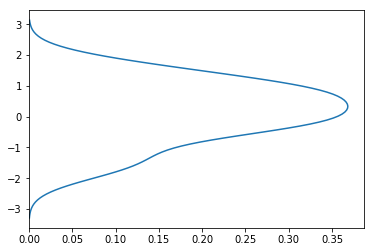

In [12]:
#軸のいれかえ
sns.kdeplot(dataset,vertical=True)

(array([ 2.,  3.,  4.,  5., 10., 14., 16., 21., 22., 25.]),
 array([-1.82294359, -1.47416256, -1.12538152, -0.77660049, -0.42781945,
        -0.07903842,  0.26974262,  0.61852365,  0.96730469,  1.31608573,
         1.66486676]),
 <a list of 10 Patch objects>)

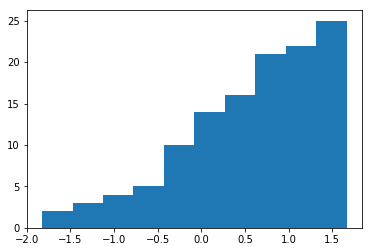

In [13]:
#累積分布関数、 distribution function
#ヒスとグラムを積み上げる
plt.hist(dataset, cumulative=True)

ImportError: Cumulative distributions are currentlyonly implemented in statsmodels.Please install statsmodels.

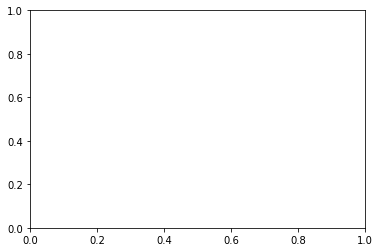

In [16]:
#上記をなめらかに

sns.kdeplot(dataset,cumulative=True)

In [18]:
#二次元分布
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

C:\Users\tetsu\Anaconda3\envs\tf111gpu\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


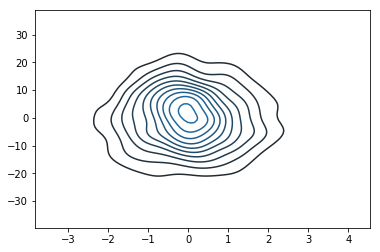

In [22]:
dframe = pd.DataFrame(dataset2,columns=["X", "Y"])
sns.kdeplot(dframe)

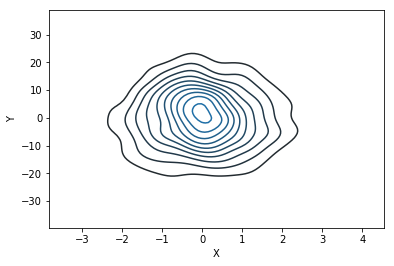

In [23]:
sns.kdeplot(dframe.X,dframe.Y)

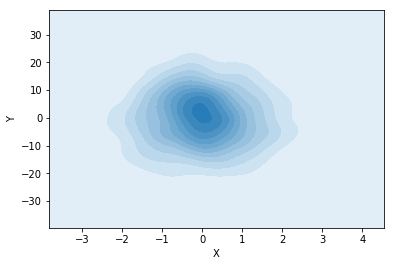

In [24]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

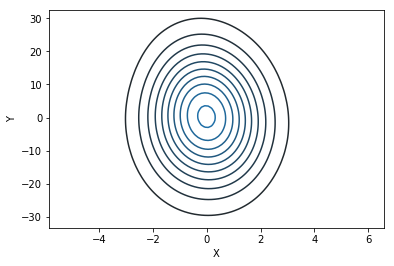

In [25]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

ValueError: `bw_method` should be 'scott', 'silverman', a scalar or a callable.

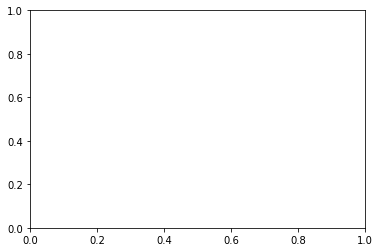

In [26]:
sns.kdeplot(dframe, bw="silvermman")

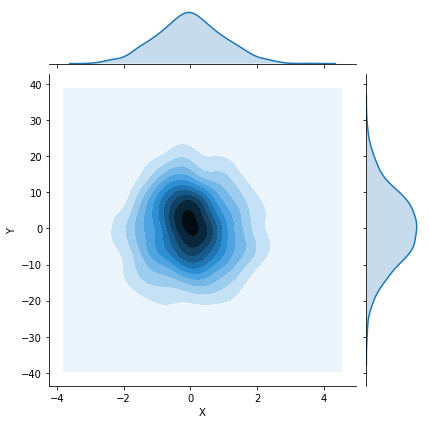

In [27]:
sns.jointplot("X","Y",dframe,kind="kde")